In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [398]:
df = pd.read_csv("2017/survey.csv")

In [399]:
len(df)

1453

In [400]:
df = df.rename(columns={"Rating (Num)": "rating", "Schedule Pacing": "pacing", "Location": "location", "Week":"week", "ID":"id", "Track":"track"})

In [401]:
df.columns

Index(['id', 'location', 'track', 'week', 'rating', 'pacing'], dtype='object')

In [402]:
df.shape

(1453, 6)

In [403]:
## Data Wrangling
df = df[df['rating'] != '#ERROR!']


In [404]:
category_rating = df.loc[:, 'rating'].astype(int)


### Q.1 How much data do we have for each category per week?

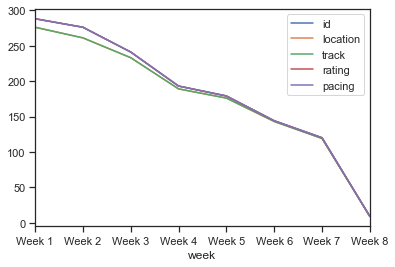

In [405]:
## Using built in Pandas Group By function
df.groupby('week').count().plot()

####  Answer-->The further ahead we are in time, the less data we have. Data based on the last or last two weeks may not be reliable hence I will prefer to do time-independant data analysis ahead.

In [406]:
## Classifying promoters, passives and detractors
def nps_classifier(rating):
    ''' 0's have been counted as Detractors.
    '''
    if rating < 0 or rating > 10:
        raise ValueError('Number out of bounds')
    
    if 9 <= rating <= 10:
        return 'Promoter'
    
    elif 7 <= rating <= 8:
        return 'Passive'
    
    else:
        return 'Detractor'

In [417]:
## Create a category column based on the above classification
df['category'] = category_rating.apply(nps_classifier)

df

,id,location,track,week,rating,pacing,category
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor


In [408]:
def nps_calculator(series):
    counts = series.value_counts()
    print(counts)
    for each in ['Promoter', 'Passive', 'Detractor']:
        if each not in counts:
            counts[each] = 0
    difference_promoter_and_detractor = (counts['Promoter'] - counts['Detractor'])
    nps = difference_promoter_and_detractor / sum(counts) * 100
    return nps

nps_calculator(df['category'])


Promoter     760
Passive      569
Detractor    121
Name: category, dtype: int64


44.06896551724138

### How many more promoters are there than detractors across our 2017 data?


### Q. 2 What percentage of total students are promoters, passives, and detractors?

In [409]:
total = nps_calculator(df['category'])

Promoter     760
Passive      569
Detractor    121
Name: category, dtype: int64


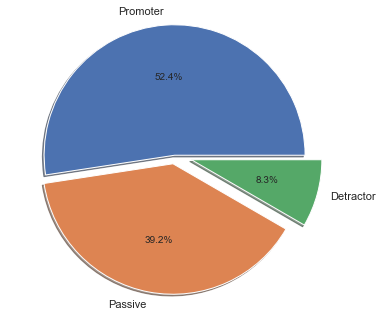

In [410]:
exp_vals = [760,569,121]
exp_labels = ["Promoter", "Passive", "Detractor"]
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=1.5,explode=[0,0.1,0.2])
plt.show()


#### Answer
#### Promoters - 52.4%,
#### Passives - 39.2%,
#### Detractors- 8.3%

### Q.3 What are the NPS ratings location wise and Track wise?

In [411]:
pd.crosstab(df['location'], df['category'], normalize="index")


category,Detractor,Passive,Promoter
location,,,
Atlanta,0.000000,0.272727,0.727273
Beijing,0.000000,0.320513,0.679487
Chicago,0.057143,0.414286,0.528571
Hong Kong,0.272727,0.636364,0.090909
Los Angeles,0.047170,0.311321,0.641509
New York City,0.106061,0.412121,0.481818
Oakland,0.042553,0.382979,0.574468
Redwood City,0.086207,0.396552,0.517241
San Francisco,0.086111,0.375000,0.538889


#### Answer
#### Atlanta - Highest Promoter
#### Hong Kong - Highest Detractor

In [418]:
#### will normalize over each row
pd.crosstab(df['track'], df['category'], normalize="index")


category,Detractor,Passive,Promoter
track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


#### Answer

#### VR - Highest Promoter
#### Apps, Explorer - Highest Detractor

### Does the student experience get better the longer that they are enrolled at the Summer Academy?


### Q.4 How does the overall student experience change over time?

Passive      131
Promoter     129
Detractor     28
Name: category, dtype: int64
Promoter     137
Passive      116
Detractor     23
Name: category, dtype: int64
Promoter     135
Passive       86
Detractor     20
Name: category, dtype: int64
Promoter     100
Passive       74
Detractor     19
Name: category, dtype: int64
Promoter     97
Passive      67
Detractor    15
Name: category, dtype: int64
Promoter     77
Passive      59
Detractor     8
Name: category, dtype: int64
Promoter     78
Passive      34
Detractor     8
Name: category, dtype: int64
Promoter    7
Passive     2
Name: category, dtype: int64
Promoter     760
Passive      569
Detractor    121
Name: category, dtype: int64


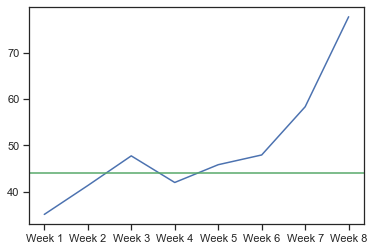

In [413]:
fig, ax = plt.subplots()
aggregate = df.groupby('week')['category'].agg(calculate_nps)
ax.plot(aggregate)
ax.axhline(calculate_nps(df['category']), color='g')


### Answer--> Data shows it gets better

#### What are things we could find here that could “help the business”?


### Q. 5 Should VR track be brought back?

In [414]:
df['track'].value_counts()


Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: track, dtype: int64

In [415]:
pd.crosstab(df['track'], df['category'], normalize="index")


category,Detractor,Passive,Promoter
track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


Text(5, 12.3, 'Heat Map')

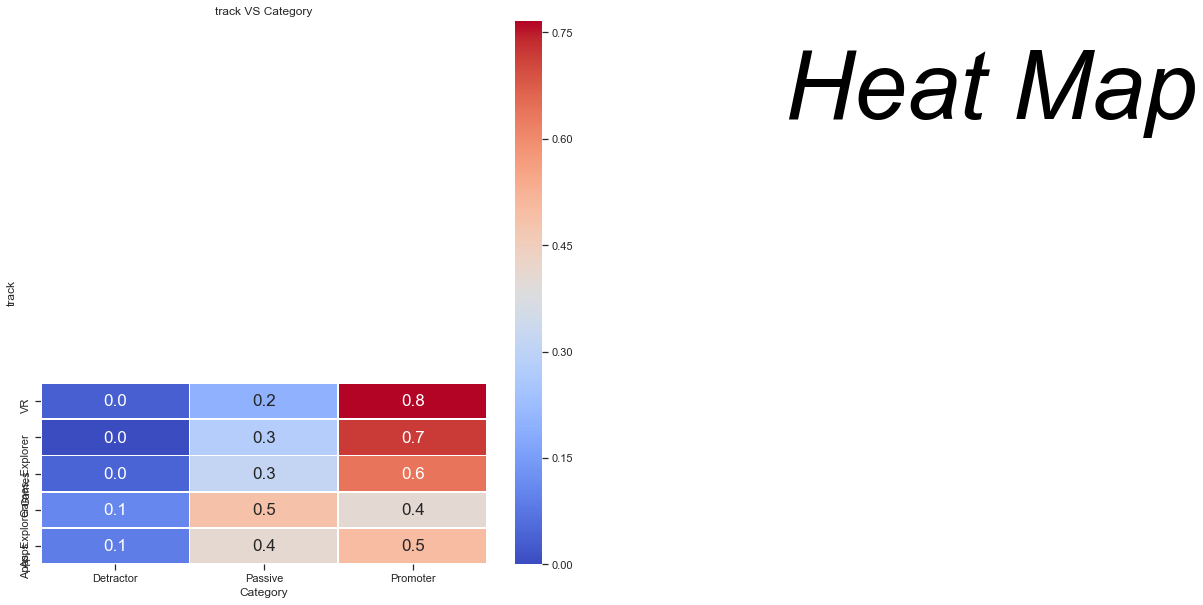

In [416]:
fig, ax = plt.subplots(figsize=(10, 10))
m = sns.heatmap(pd.crosstab(df['track'], df['category'], normalize='index'), cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':17}, linewidths=.8, ax=ax)
plt.title('track VS Category')
plt.xlabel('Category')
plt.ylabel('track')
ax.set_ylim((0,15))
plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')


#### Answer--> Yes, but more data could confirm our conclusion